In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10, log
%matplotlib inline

## Q1

In [2]:
N = 1000

In [3]:
def f(order, x = None):
    b = 13
    pi = np.pi
    if x is None:
        x = np.repeat(np.linspace(0,3.3, N)[:, np.newaxis], order, axis=1).T 
    else:
        x = np.repeat(x[:, np.newaxis], order, axis=1).T 
    a = 0.5
    n = np.repeat(np.arange(0,order)[:, np.newaxis],N , axis=1)

    return ((a**n)*np.cos((b**n)*pi*x)).sum(axis=0)

Analytical integral

In [4]:
def integral_f(order, l, u):
    b = 13
    a = 0.5
    pi = np.pi
    n = np.arange(0,order)
    
    I_l = ((a**n)*np.sin((b**n)*pi*l)/((b**n)*pi)).sum()
    I_u = ((a**n)*np.sin((b**n)*pi*u)/((b**n)*pi)).sum()
    
    return I_u - I_l

In [5]:
avg_error = []
for i in range(5,20):
    avg_error.append(((f(i)-f(i+1))**2).sum()/N)

Text(0.5,0,'n')

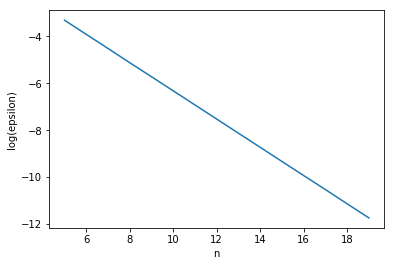

In [6]:
plt.plot(list(range(5,20)), list(map(log10,avg_error)))
plt.ylabel("log(epsilon)")
plt.xlabel("n")

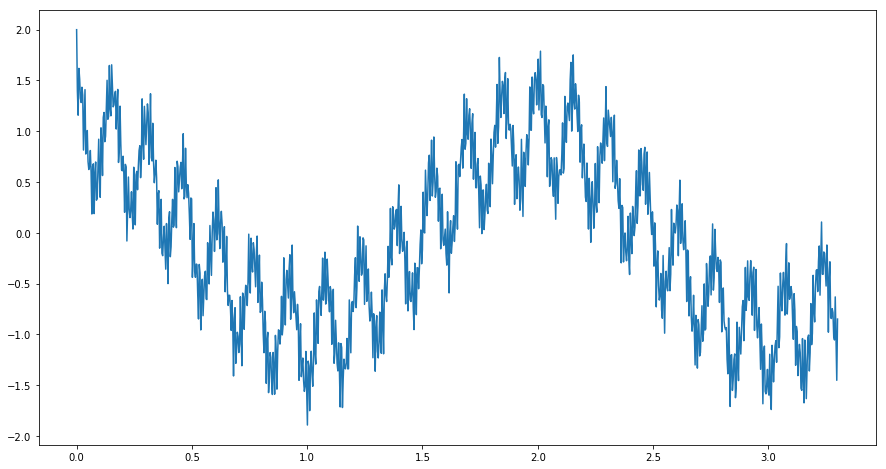

In [7]:
plt.figure(figsize=(15,8))
plt.plot(np.linspace(0,3.3, N), f(15))

In [8]:
samples = []
for j in range(30000):
    samples.append((f(15, np.random.rand(N)*3.3).sum())*3.3/N)

Computed value

In [9]:
sum(samples)/len(samples)

-0.2533300295893797

Exact value

In [10]:
integral_f(15, 0, 3.3)

-0.2541108123414165

## Q2

In [11]:
sample_pi = []
for k in range(5000):
    M = 100000
    centre = np.random.ranf(M)*2
    theta = np.random.ranf(M)*np.pi/2

    m = (centre-(1/2)*np.cos(theta) <= 0) | (centre+(1/2)*np.cos(theta) >= 2)
    sample_pi.append(M/m.sum())

Computed value

In [12]:
sum(sample_pi)/len(sample_pi)

3.1416983677923342

Exact value

In [13]:
np.pi

3.141592653589793